# DATA 690-02: Individual Project PART B

The World Bank holds huge amount of data and categorized them to various indicators from 22 topics including Education, Health, Environment, Energy etc. This data that has been collected from the past few decades from various recognized international resources is kept open for public so that it can be used for various analysis and projects. This report contains the analysis on how energy usage using non-renewable energy sources and its consumption from sectors such as industries, commercial, non-commercial etc. is impacting the environment and health.

The fossil fuels include most of the non-renewable energy resources such as Coal, Petroleum products, Nuclear energy etc. which are used for electricity generation, Transport, plastic products etc. These industries, vehicles and factories that generates electricity releases tremedous amounts of pollutants such as CO2, NO2 etc. in to air and water causing severe damage to the environment. This will cause severe damage to the all life forms and is not limited to humans. The diseases that are primarliy linked to airpollution includes, strokes, CVD, Cancers and chronic respiratory infections. The analysis from the data of the three key economic powers of Asia, Europe and North america will helps us understand the change, impacts and other factors contributing to the scenario. The comparison of fossil fuel consumption needs to be done between the 3 countries USA, Germany and Japan. For further analysis, the CO2 emission quantities of these countries will help us understand if that is the primary factor of the impact on health and there is a relation between the two. If not there is a need to look at other contributers for the analysis and research on the hypothesis.

In [30]:
import pandas as pd # Importing required modules
df = pd.read_csv('https://github.com/RohiniSalla/world_development_explorer/raw/main/Data/wdi_data.csv') #reading data to df dataframe

In [31]:
df.head() # A glance at the data

,Unnamed: 0,Year,SH.DYN.NCOM.ZS,EG.USE.COMM.FO.ZS,EN.ATM.CO2E.GF.ZS,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2005,14.1,81.855676,22.330856,DEU,Germany,Europe & Central Asia,High income,Not classified
1,1,2010,13.1,79.560350,22.938319,DEU,Germany,Europe & Central Asia,High income,Not classified
2,2,2015,12.5,78.862551,20.524848,DEU,Germany,Europe & Central Asia,High income,Not classified
3,3,2005,10.4,81.611862,13.039547,JPN,Japan,East Asia & Pacific,High income,Not classified
4,4,2010,9.5,80.910954,16.774034,JPN,Japan,East Asia & Pacific,High income,Not classified


In [32]:
df.isnull().any() # Checking for null values if any

Unnamed: 0           False
Year                 False
SH.DYN.NCOM.ZS       False
EG.USE.COMM.FO.ZS    False
EN.ATM.CO2E.GF.ZS    False
Country Code         False
Country Name         False
Region               False
Income Group         False
Lending Type         False
dtype: bool

Text(0, 0.5, 'Fossil fuel energy consumption(% of total)')

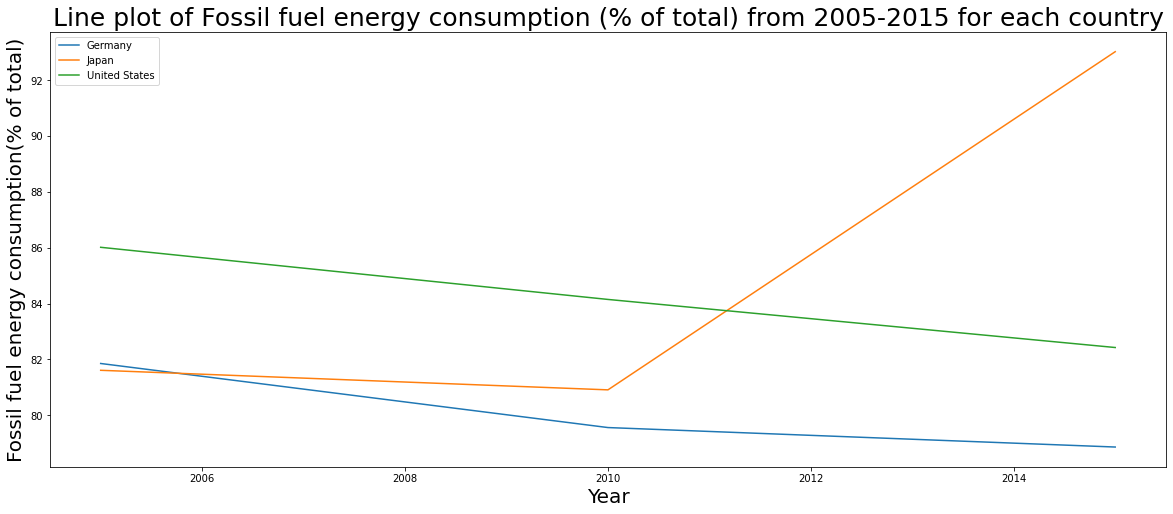

In [33]:
# importing matplotlib for line plots
import matplotlib.pyplot as plt
# Created 3 dataframe objects for 3 countries to analyze
d=df[df['Country Name']=='Germany']
e=df[df['Country Name']=='Japan']
f=df[df['Country Name']=='United States']

plt.figure(figsize=(20,8))# Setting figsize
#Lineplots
plt.plot( 'Year', 'EG.USE.COMM.FO.ZS', data=d, label='Germany')
plt.plot( 'Year', 'EG.USE.COMM.FO.ZS', data=e, label='Japan')
plt.plot( 'Year', 'EG.USE.COMM.FO.ZS', data=f, label= 'United States')
plt.legend()
# Title, xlabel and ylabel
plt.title("Line plot of Fossil fuel energy consumption (% of total) from 2005-2015 for each country", fontsize= 25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Fossil fuel energy consumption(% of total)', fontsize= 20)

From the above graph we can see that, the consumption of the fossil fuels (%) in the united states is gradually decreasing. It is clear that, germany has been reducing its fossil fuel dependency for energy from the 2005 to 2015. The fossil fuel consumption percentage of asian country Japan, shows decreased use from 2005 to 2010, has abruplty increased its fossil fuel consumption from 2010 to 2015.



Text(0, 0.5, 'CO2 emissions from gaseous fuel consumption(% of total)')

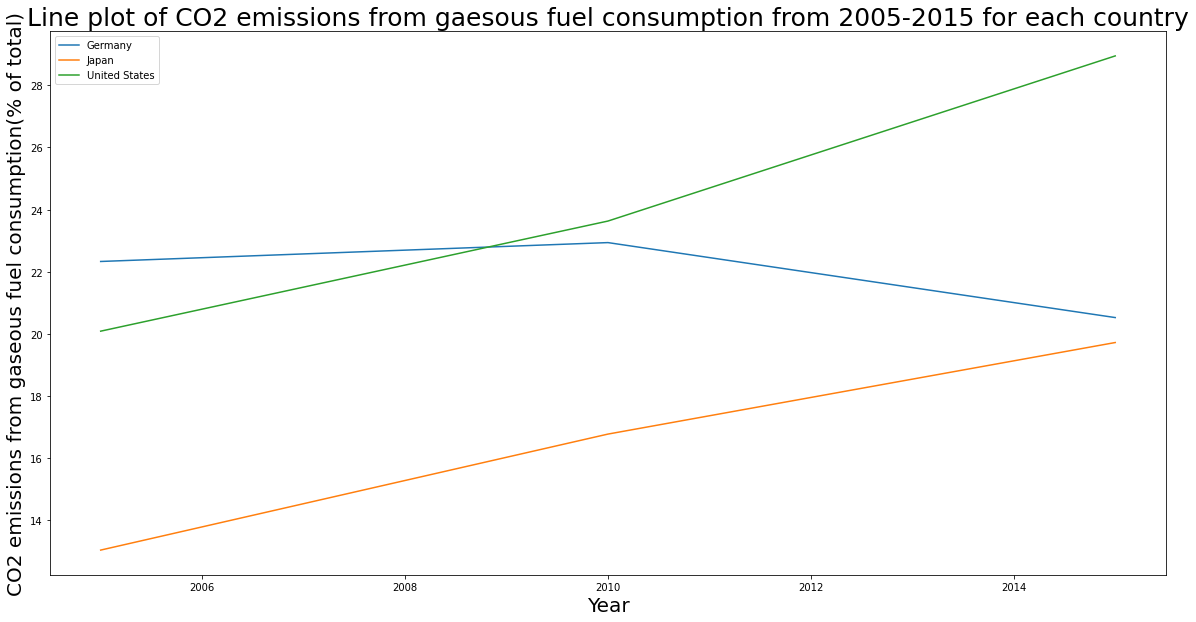

In [34]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'EN.ATM.CO2E.GF.ZS', data=d, label='Germany')
plt.plot( 'Year', 'EN.ATM.CO2E.GF.ZS', data=e, label='Japan')
plt.plot( 'Year', 'EN.ATM.CO2E.GF.ZS', data=f, label= 'United States')
plt.legend()
plt.title("Line plot of CO2 emissions from gaesous fuel consumption from 2005-2015 for each country", fontsize= 25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 emissions from gaseous fuel consumption(% of total)', fontsize= 20)

It is obvious to think that, CO2 emission percentage will increase with increase in fossil fuel consumption but from the above line plot above, we can observe that in United states and Japan, there is increase in CO2 emissions from 2005 to 2015. In contrast, Germany showed reduction in CO2 emissions from the year 2010. So it is clear that, the government policies on the environment protection is a factor that needs to be considered. Let us look at further analysis on this

Text(0, 0.5, 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)')

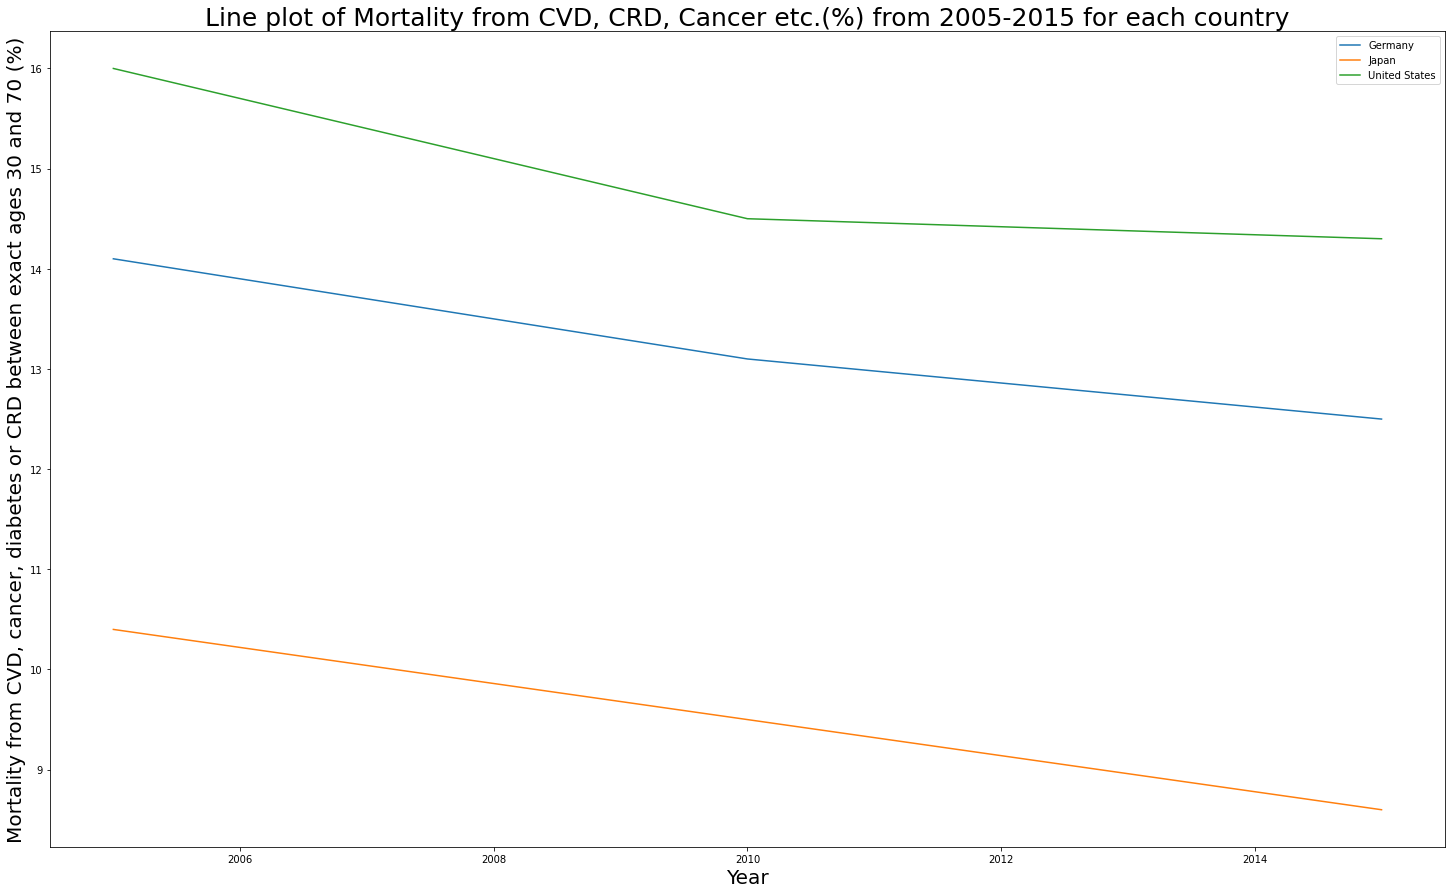

In [35]:
plt.figure(figsize=(25,15))
plt.plot( 'Year', 'SH.DYN.NCOM.ZS', data=d, label='Germany')
plt.plot( 'Year', 'SH.DYN.NCOM.ZS', data=e, label='Japan')
plt.plot( 'Year', 'SH.DYN.NCOM.ZS', data=f, label= 'United States')
plt.legend()
plt.title("Line plot of Mortality from CVD, CRD, Cancer etc.(%) from 2005-2015 for each country", fontsize= 25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)', fontsize= 20)

From the further analysis on the mortality from CVD, cancer, diabetes and CRD for the 3 countries, we can notice from the line plot that, although the mortality rate for the diseases in all the 3 countries showed decreasing but America holds highest number in 2015, followed by germany and Japan. This reduction in mortality rate is encouraging but the improvement in health care sector, awareness towards government policies, literacy rate, science and technology improvements from 2005 to 2015 might be the primary cause.



In [36]:
# Created dataframe objects grouped by each year
y1=df[df['Year']==2005]
y2=df[df['Year']==2010]
y3=df[df['Year']==2015]

In [37]:
# Normalizing third variable: Moratality rate (%) for bubble size
i_normal = y1['SH.DYN.NCOM.ZS'] / y1['SH.DYN.NCOM.ZS'].max()
s_normal = y2['SH.DYN.NCOM.ZS'] / y2['SH.DYN.NCOM.ZS'].max()
j_normal = y3['SH.DYN.NCOM.ZS'] / y3['SH.DYN.NCOM.ZS'].max()

In [38]:
# importing and installing plotly library for interactive bubble plot
import plotly.express as px
# Creating scatter plot with bubble size based on normalized data of Mortality rate (%)
fig = px.scatter(df.query("Year==2005"), x="EG.USE.COMM.FO.ZS",
                 y="EN.ATM.CO2E.GF.ZS", color="Country Name",
                 labels = {"EG.USE.COMM.FO.ZS": "Fossil fuel energy consumption (% of total)",
                           "EN.ATM.CO2E.GF.ZS":"CO2 emissions from gaseous fuel consumption (% of total)"
                           },
                 hover_name="Country Name", log_x=True, size = i_normal * 2000)
fig.update_layout(title='Bubble size: Mortality from CVD, CRD, Cancer etc.(%) in the year 2005')
fig.show()

From the year 2005 to 2010 the germany had the highest CO2 emissions and Japan had the lowest but United states had the highest fuel consumptuon percentage.


In [41]:
# Creating scatter plot with bubble size based on normalized data of Mortality rate (%)
fig = px.scatter(df.query("Year==2010"), x="EG.USE.COMM.FO.ZS",
                 y="EN.ATM.CO2E.GF.ZS", color="Country Name",
                 labels = {"EG.USE.COMM.FO.ZS": "Fossil fuel energy consumption (% of total)",
                           "EN.ATM.CO2E.GF.ZS":"CO2 emissions from gaseous fuel consumption (% of total)"
                           },
                 hover_name="Country Name", log_x=True, size = s_normal * 2000)
fig.update_layout(title='Bubble size: Mortality from CVD, CRD, Cancer etc.(%) in the year 2010')
fig.show()

In the year 2010, United states CO2 emission percentage increased to that of germany. Furthermore, the Japan's CO2 content in the atmosphjere is also increased.


In [42]:
# Creating scatter plot with bubble size based on normalized data of Mortality rate (%)
fig = px.scatter(df.query("Year==2015"), x="EG.USE.COMM.FO.ZS",
                 y="EN.ATM.CO2E.GF.ZS", color="Country Name",
                 labels = {"EG.USE.COMM.FO.ZS": "Fossil fuel energy consumption (% of total)",
                           "EN.ATM.CO2E.GF.ZS":"CO2 emissions from gaseous fuel consumption (% of total)"
                           },
                 hover_name="Country Name", log_x=True, size = j_normal * 2000)
fig.update_layout(title='Bubble size: Mortality from CVD, CRD, Cancer etc.(%) in the year 2015')
fig.show()

By the year 2015, the fuel dependency is increased in the japan, showing similar change in the CO2 emissions and mortality rate percentage of diseases from air pollutants.
